<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task 2

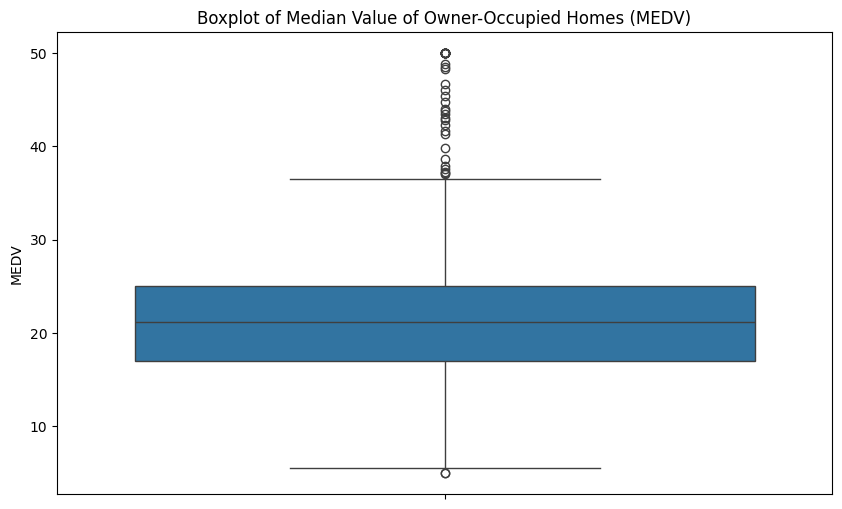

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV')
plt.show()


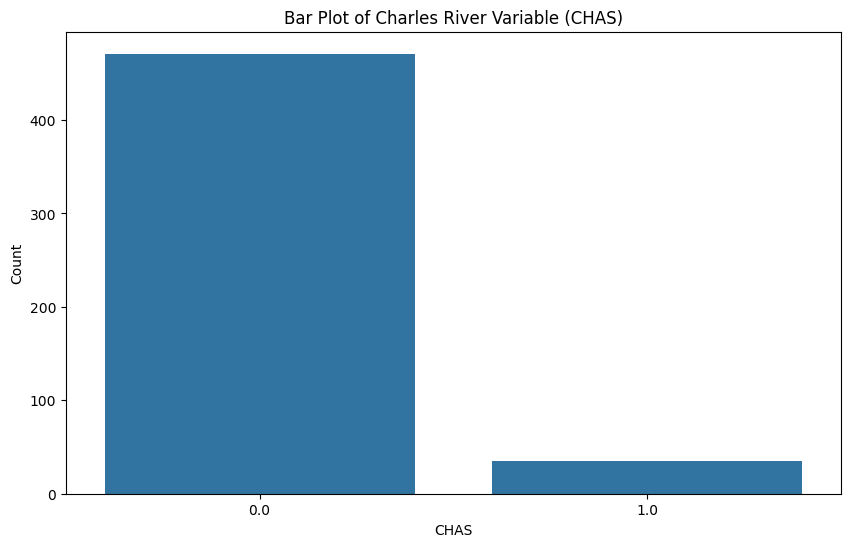

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()


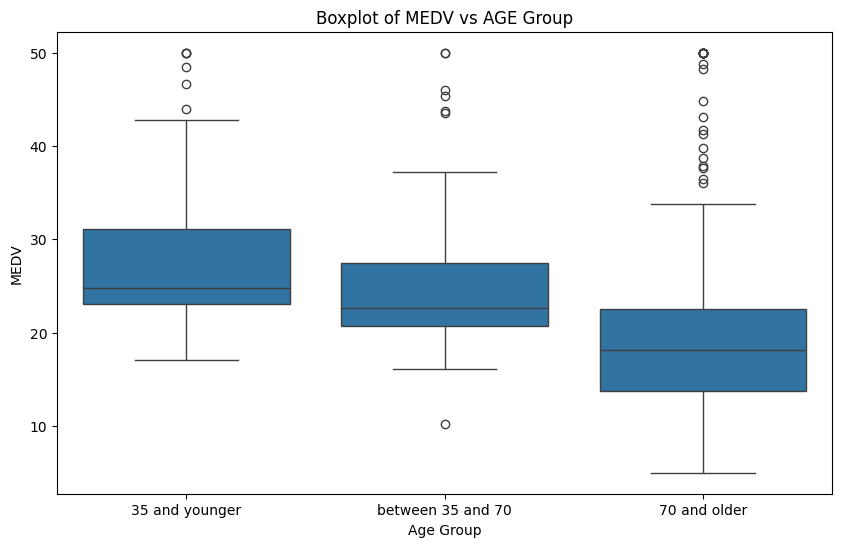

In [7]:
# Discretize the AGE variable
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', 'between 35 and 70', '70 and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()


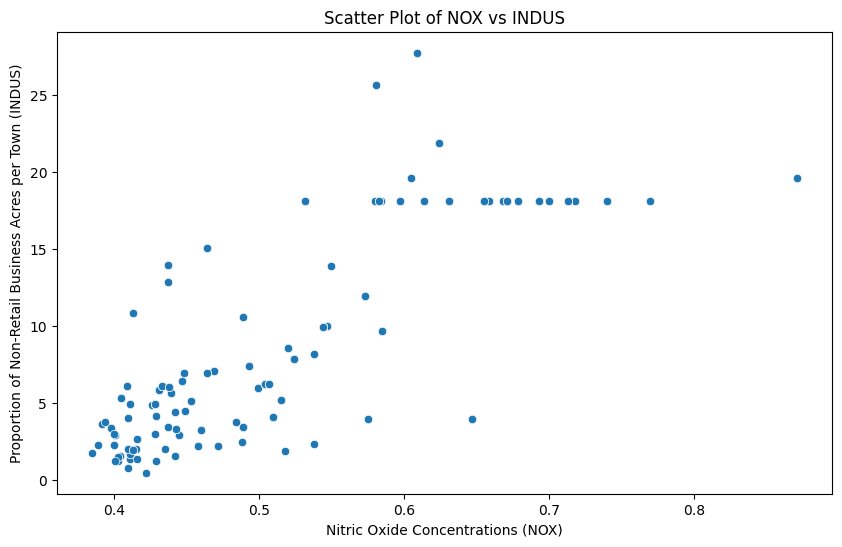

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.show()


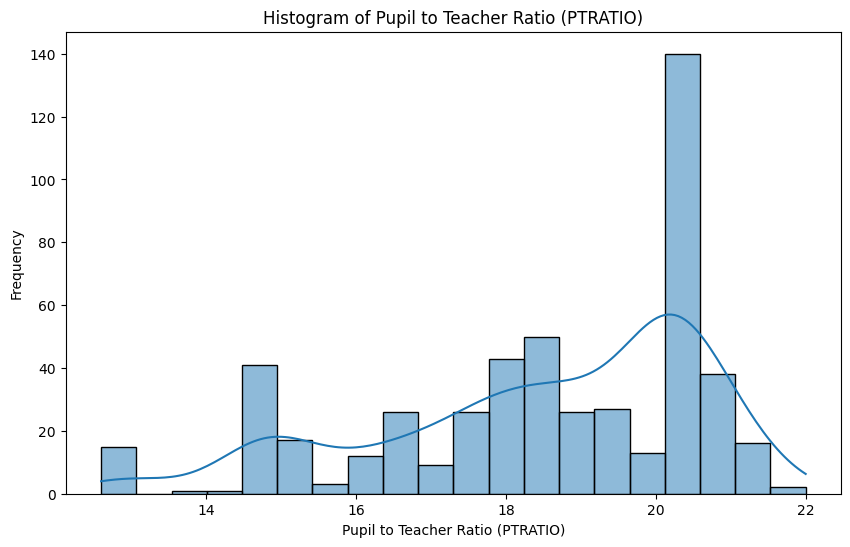

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()


Task 3

In [10]:
from scipy.stats import ttest_ind

# Split the data into two groups based on the CHAS variable
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the t-test
t_stat, p_value = ttest_ind(chas_0, chas_1)

# Output the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


In [11]:
from scipy.stats import f_oneway

# Discretize the AGE variable into three groups as before
age_group_1 = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
age_group_2 = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70']['MEDV']
age_group_3 = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']

# Perform the ANOVA
f_stat, p_value = f_oneway(age_group_1, age_group_2, age_group_3)

# Output the results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


In [12]:
from scipy.stats import pearsonr

# Perform the Pearson correlation
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the results
print(f'Pearson Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')


Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


In [13]:
import statsmodels.api as sm

# Define the independent variable (DIS) and the dependent variable (MEDV)
X = boston_df['DIS']
Y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(Y, X).fit()

# Output the summary of the regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        22:41:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Done by Nayeem.